In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
from numpy import mean

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [36]:
# create engine to hawaii.sqlite
hawaii_path = "hawaii_db"
engine = create_engine("sqlite:///hawaii1.sqlite")
conn = engine.connect()


In [37]:
# reflect an existing database into a new model
Base.metadata.create_all(engine)
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [38]:
# View all of the classes that automap found
Base

sqlalchemy.ext.automap.Base

In [39]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [41]:
# Find the most recent date in the data set.
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent

('2017-08-23')

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last12 = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
olddf = pd.DataFrame(last12[:], columns=['precipitation', 'date'])
olddf.set_index('date', inplace=True, )
newdf = olddf.dropna()








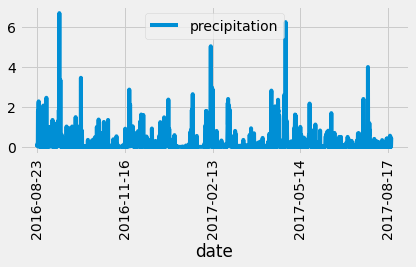

In [43]:
newdf.plot(rot=90)
plt.tight_layout()
plt.show()

In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = newdf.describe(include='all') 
summary

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [66]:
# Design a query to calculate the total number stations in the dataset
session_amount = session.query(func.count(station.station)).all()
session_amount

[(9)]

In [95]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#mostactive = session.query(func.count(measurement.station).order_by(station.station)).all()
mostactive = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
mostactive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [99]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
usc005 = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
usc005


[(54.0, 85.0, 71.66378066378067)]

In [100]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#mostrecent = session.query(measurement.date).\
    #filter(measurement.station == 'USC00519281').\
    #order_by(measurement.date.desc()).first()

last12s = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.station == 'USC00519281').all()
last12s


[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

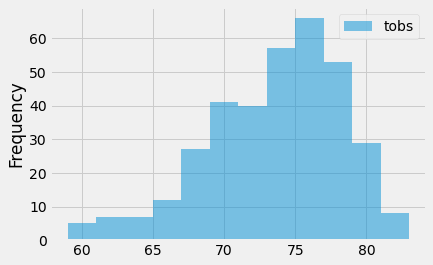

In [102]:
#histogram
oldf = pd.DataFrame(last12s[:], columns=['date', 'tobs'])
oldf.set_index('date', inplace=True, )
newwwdf = oldf.dropna()
hist = newwwdf.plot.hist(bins=12, alpha=0.5)
hist

# Close session

In [99]:
# Close Session
session.close()